# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

 **Answer: ** I will use classification type supervised learning problem to identify students who might need early intervention before they fail to graduate.
 I choose classification because our traget is to predict a student fail or pass, it is can be simply converted to 0 (fail) and 1 (pass).when we get the prediction '0' then we predict that studnet fails and intervene thenbefore they fail to graduate

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

print student_data.head()

Student data read successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   
3  ...        yes      yes       3         2      2    1    1      5        2   
4  ...         no       no       4         3      2    1    2      5        4   

  passed  
0     no  
1 

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = len(student_data.index)

# TODO: Calculate number of features
n_features = len(student_data.columns[:-1])

# TODO: Calculate passing students
pass_series=student_data.passed.value_counts('yes')

n_passed = pass_series.yes*n_students

# TODO: Calculate failing students
n_failed = pass_series.no*n_students

# TODO: Calculate graduation rate
grad_rate = pass_series.yes*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265.0
Number of students who failed: 130.0
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()


Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
            
        col_data = col_data.astype(float)
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [5]:
X_all.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.0,0.0,1.0,0.0,18.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0
1,1.0,0.0,1.0,0.0,17.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0
2,1.0,0.0,1.0,0.0,15.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,1.0,0.0,1.0,0.0,15.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,1.0,0.0,1.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

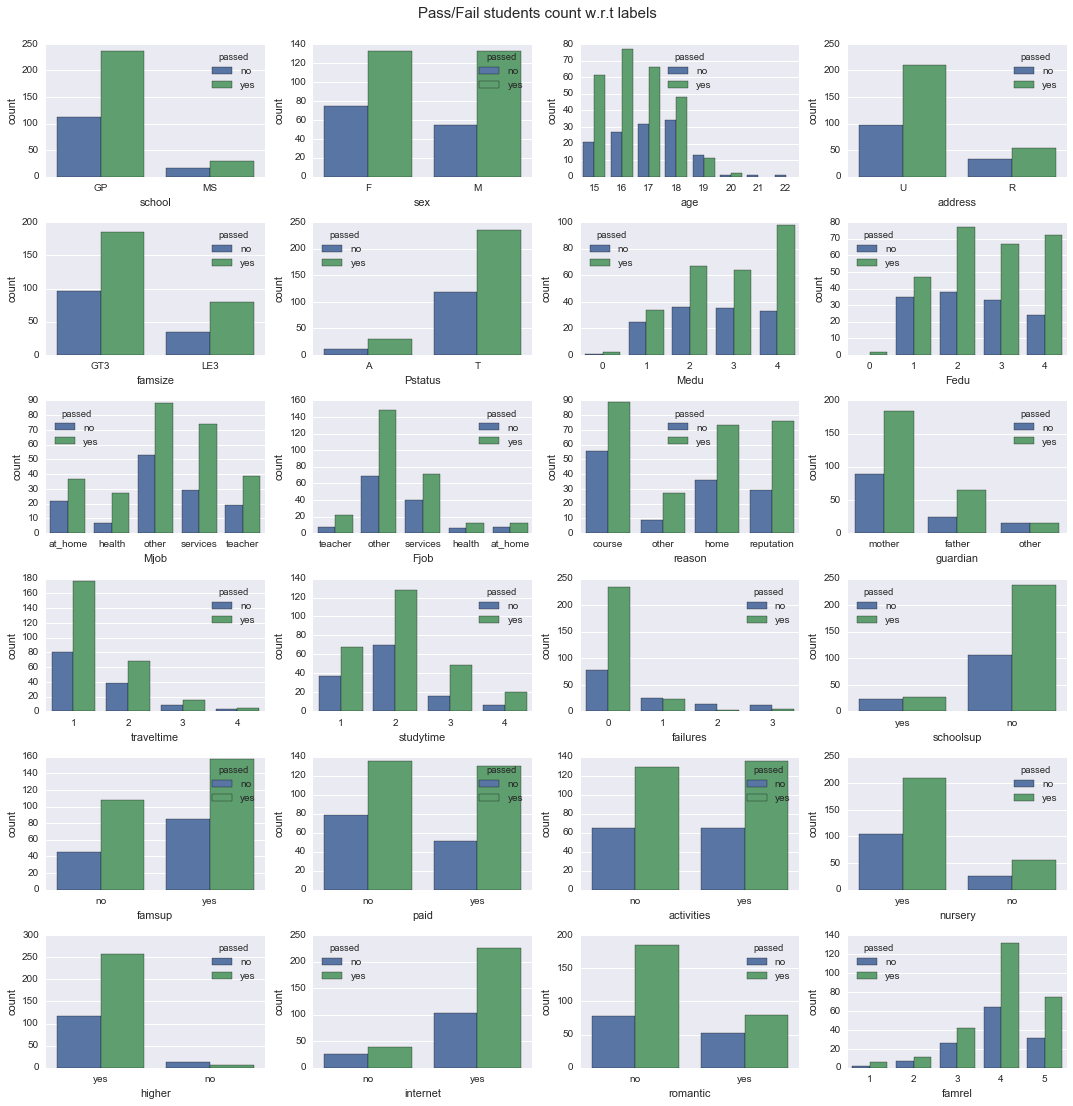

In [7]:
import seaborn as sns
fig, na_ax = plt.subplots(nrows=6,ncols=4,figsize=(15,15))
#now we have a fig and 24 subplots and an na_ax 6*4 array which conatians axis of subplots

# convert the 6*4 axeses array into a 1D array for easy iteration using ravel()
na_ax = na_ax.ravel()

for student_col, ax in zip(student_data.columns, na_ax):
    sns.countplot(x=student_col,data=student_data, hue='passed', ax=ax);
fig.suptitle('Pass/Fail students count w.r.t labels', fontsize=15, y=1.02)
fig.tight_layout();

In [8]:
def split_process_lables(X):
    output = pd.DataFrame(index=X.index)
    zput = pd.DataFrame(index=X.index)
    
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
            #col_data = col_data.astype(float)
        # If data type is categorical, convert to dummy variables


        #col_data = col_data.astype(float)
        # Collect the revised columns
        if col_data.dtype != object:
            output = output.join(col_data)
        else:
            col_data = pd.get_dummies(col_data, prefix=col)
            zput = zput.join(col_data)
            

    return output,zput
xxx,yyy = split_process_lables(student_data)


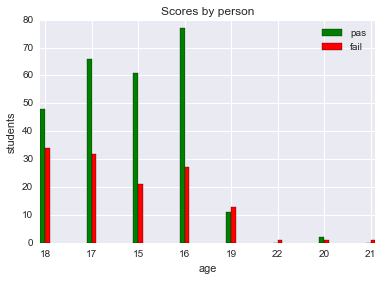

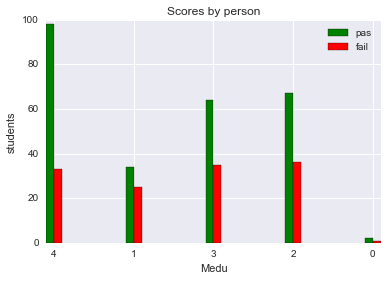

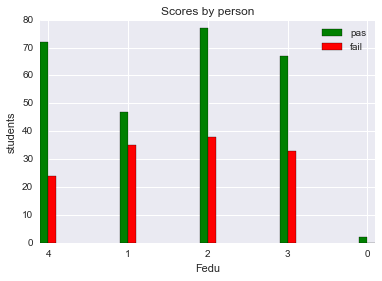

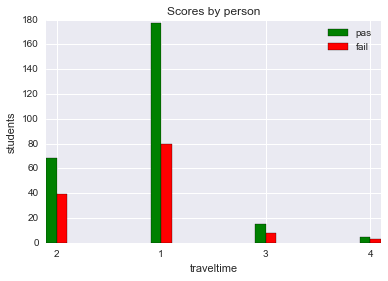

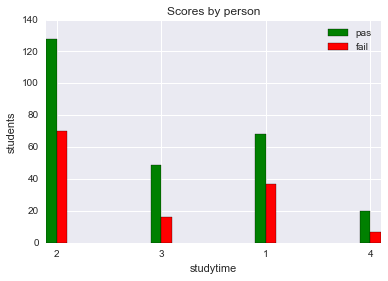

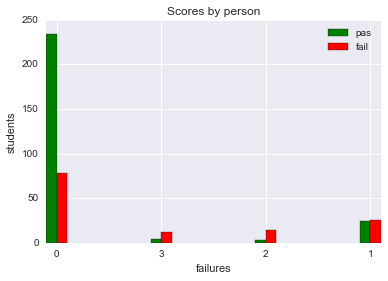

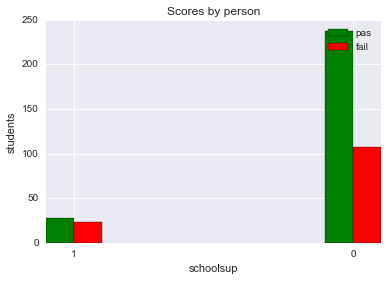

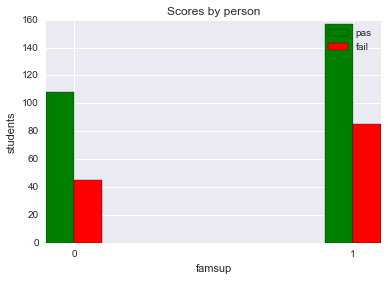

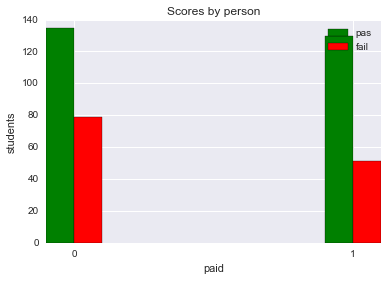

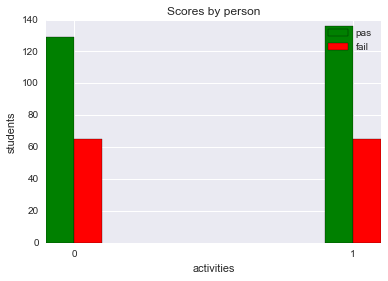

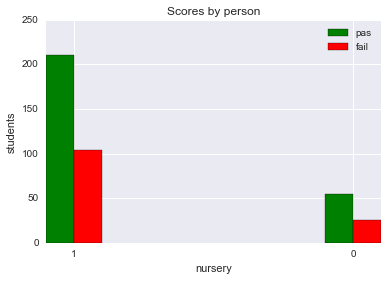

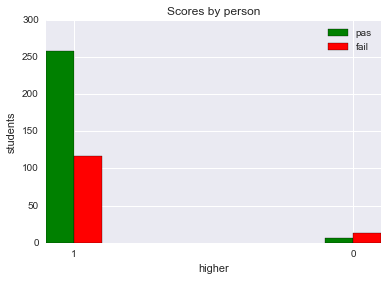

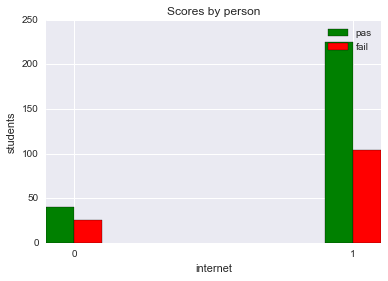

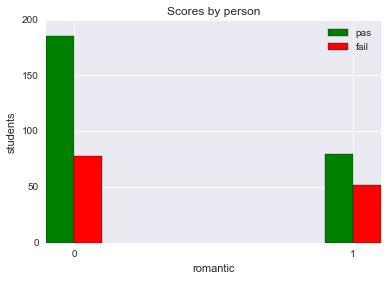

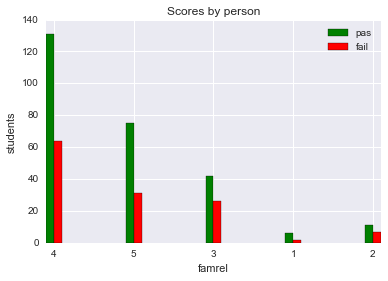

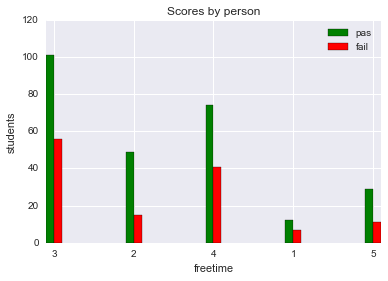

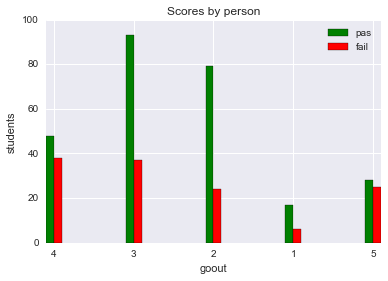

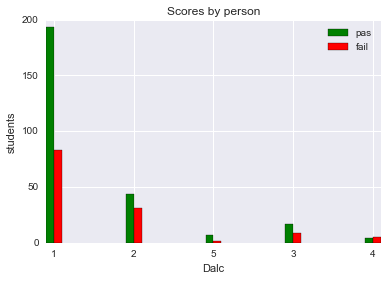

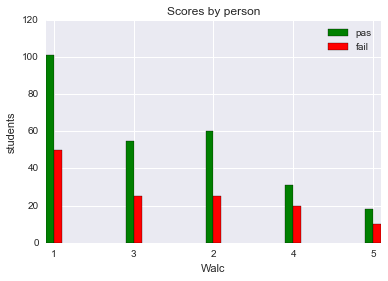

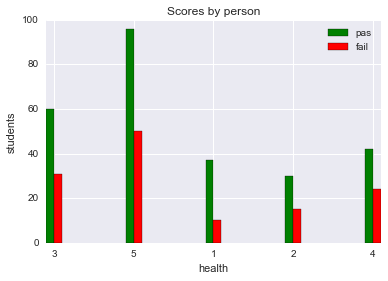

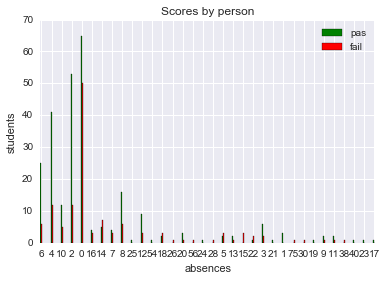

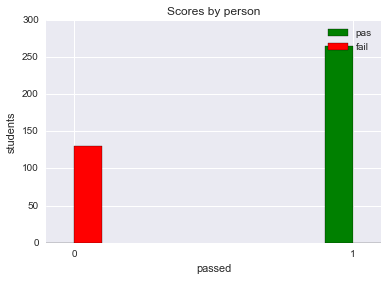

In [10]:
#I first did without seaborn and its really hard for me to this thing
#I kept this code although seaborn looks good for future purpose

plt.figure()
for col,col_values in xxx.iteritems():   
    #get all unique values in the column
    ul= xxx[col].unique()
    
    # make that unique values column list into a tuple
    tul=tuple(ul)
   
    #make a list of length of that array
    ula=np.arange(len(ul))
    width=0.1
    
    p=()
    f=()
    for ulx in ul:
        p=p+(len(xxx[(xxx.passed==1) & (xxx[col]==ulx)]),)
        f=f+(len(xxx[(xxx.passed==0) & (xxx[col]==ulx)]),)     
    
    plt.bar(ula,p, width, color='g',label='pas')
    plt.bar(ula+width,f, width, color='r',label='fail')
    
    plt.xlabel(col)
    plt.ylabel('students')
    plt.title('Scores by person')
    plt.xticks(ula + width,tul)
    plt.legend()
    
    #plt.tight_layout()
    
    plt.plot()
    plt.show()
   
    

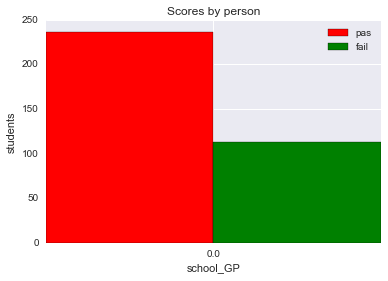

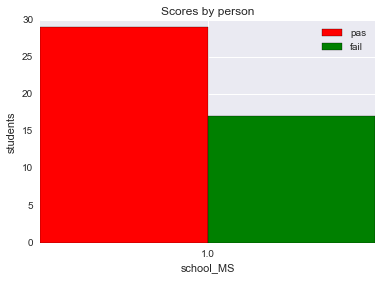

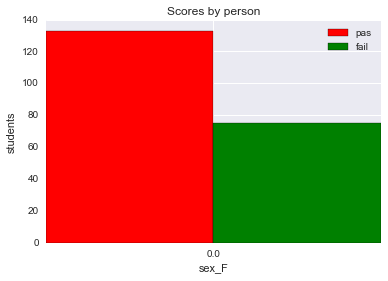

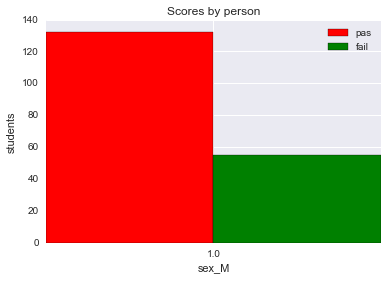

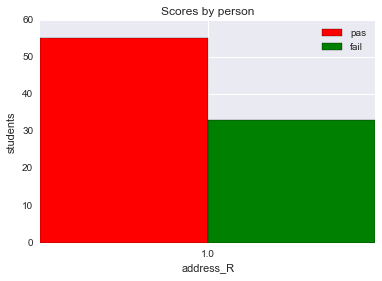

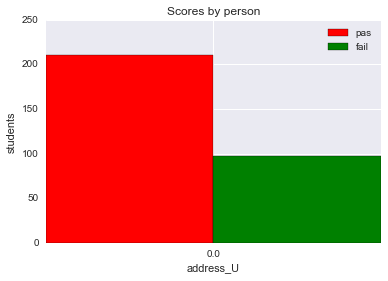

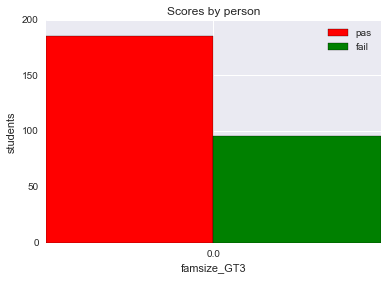

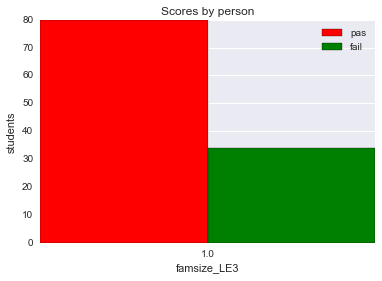

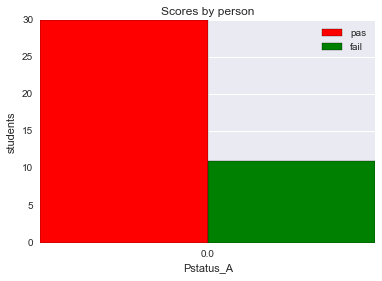

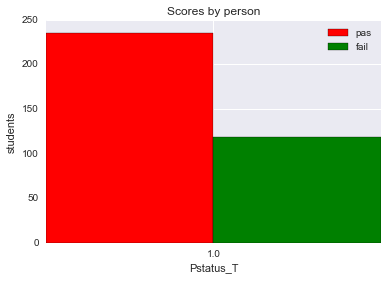

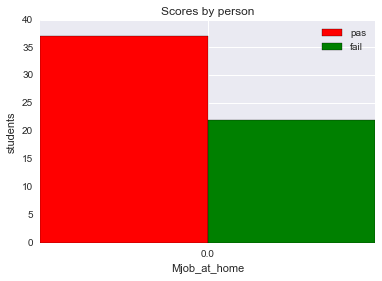

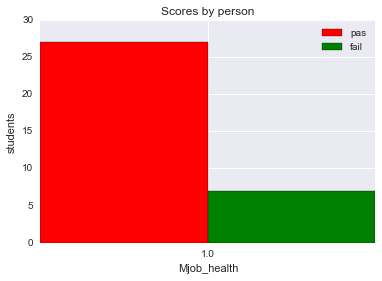

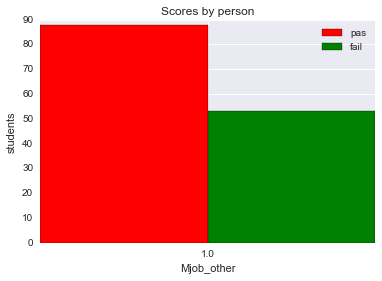

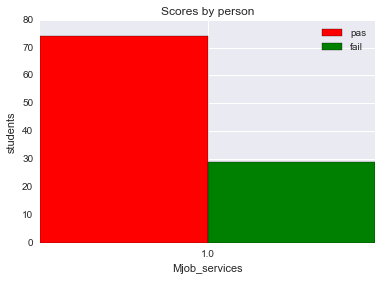

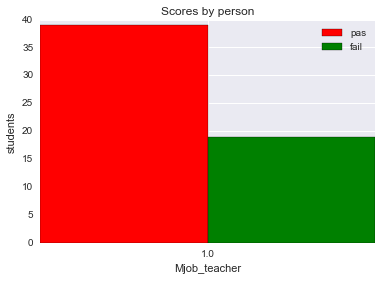

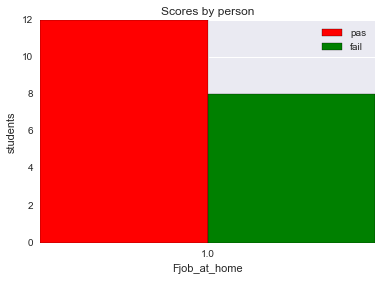

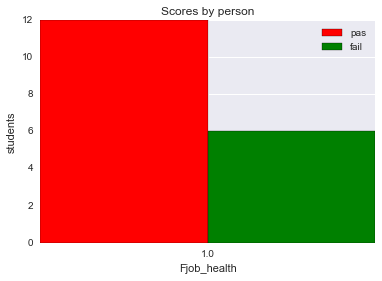

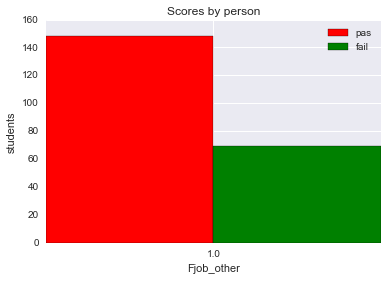

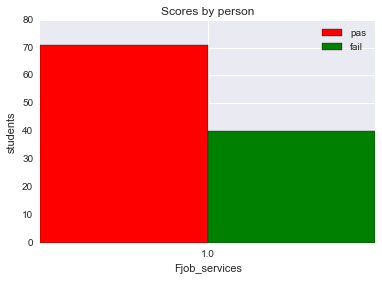

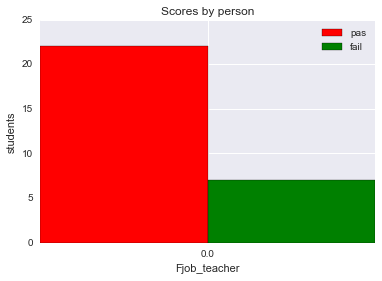

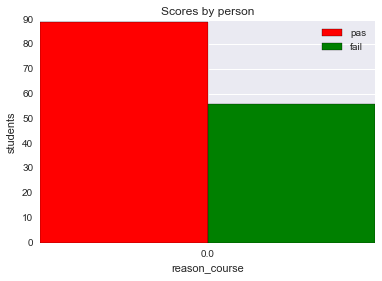

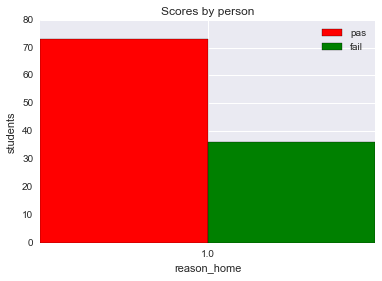

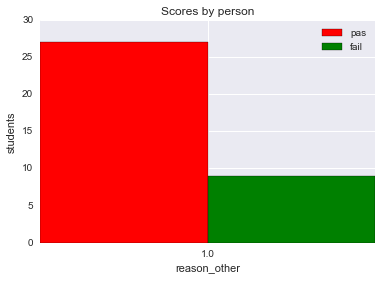

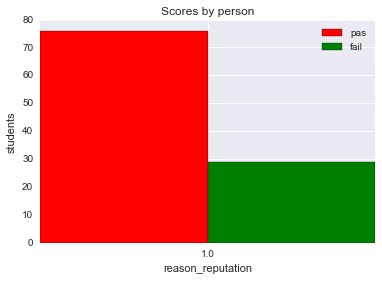

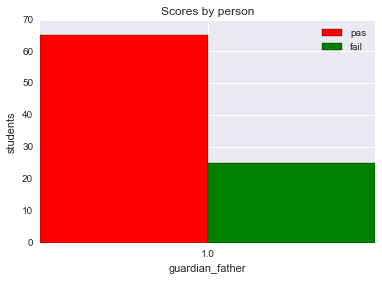

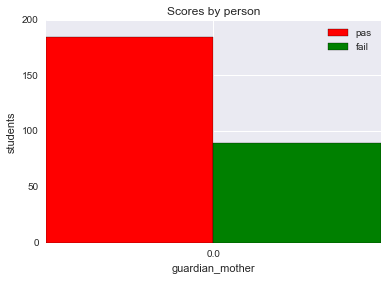

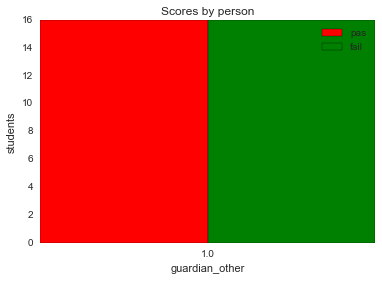

In [9]:

plt.figure()
for col,col_values in yyy.iteritems():
    #same as previous snippet
    ul= yyy[col].unique()
    tul=tuple(ul)
    zz=len(ul)
    ula=np.arange(len(ul))
    width=0.1
    
    plt.subplots(nrows=1,ncols=1)
    
    p=()
    f=()
    
    p=p+(len(yyy[(xxx.passed==1) & (yyy[col]==1)]),)
    f=f+(len(yyy[(xxx.passed==0) & (yyy[col]==1)]),)
        
    
    
    plt.bar(1,p, width, color='r',label='pas')
    plt.bar(1+width,f, width, color='g',label='fail')
    
    plt.xlabel(col)
    plt.ylabel('students')
    plt.title('Scores by person')
    plt.xticks(ula + width,tul)
    plt.legend()
    
    #plt.tight_layout()
    
    plt.plot()
    plt.show()
   

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.24, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
I choose to use classification models to solve this problem
and my its hard to choose 3 models, ususally we will  test most of the classification models and use the one with less bias and less variance as trade off

as here I need to choose only 3 models, after some research I found that it is better to always start with

1) logistic regression.
2) Support Vector Machines.
3) Ensemble classifier.

logistic regression:
- credit card fraud detection ia a real world application for logistic regression
- Strengths -> Simple,it considers all datapoints unlike KNN, outputs will be binary 0 or 1 (Yes or No)
- Weakness -> it discriminates datapoints by assigning weights to set
- it is simple to start, our target output is binary pass or fail, we have less than 100k samples

Support Vector Machines
- digital image recognisation is a real world example
- Strengths -> when your data is not linearly seperable then we use SVM with non linear kernals.
the main benifit of SVM is we can use kernal approx to seperate data.for linearly seperated data with SVM instead of seperating data using a some line we can seperate using a plane ( bunch of lines) and there might be some points falling on borders of the plane but not inside the plane
- weakness -> difficulty in choice of kernal,difficulty in selection of parameters, training and testing of data take time and costs lot of memory
- after starting with logistic regression when samples < 100k then it is better to choose SVM but we should look at time for training and testing as with latest advancements we don't care much about memory.in logistic regression we tried to seperate data linearly and now we will try it in non linear way 

Ensemble Classifier
-Ensemble classifier is just a way combining several models to get a better result than the individual , we typically use ensemble classifiers on noisy data,it is vastly used for detecting intrusion and also used in reccomendation systems.
Netflix uses ensemble learners to improve their systems, infact there was a $ 1 Million challenge to improve their systems and the winner was ensemble
- Strengths -> Lower Error,better prediction and more stable model as we are ensembling models we are reducing the error and decreasing the overfitting
- Weakness -> pron to overfitting, when we use more number of models to ensemble then we are porn to overfitting, especially when we use boosting
- when the data samples <100k and after checking support vector machines and when we will check ensemble classifiers, we will check all 4 given ensemble classifiers and most used are AdaBooster and RandomForests. AdaBooster with limited bags i.e with limited models will yield good results.AdaBooster takes some random data(60 percent train data) from trained sample and we test the resulted model on again train data and the data sample which are false in train data are given more weight in next bag 




### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [13]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "*****************************************************"

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [15]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn import svm

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier  #SGDC

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score

from datetime import datetime
import time


cl = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

# TODO: Initialize the three models
clf_A = KNeighborsClassifier()
clf_B = svm.SVC()
clf_C = AdaBoostClassifier()

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]


#print X_train_100

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
for clf in [clf_A, clf_B, clf_C]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.7972.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7068.
*****************************************************
Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0020 seconds
Made predictions in 0.0090 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.7121.
*****************************************************
Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0140 seconds.
F1 score for training set: 0.8722.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.7482.
*****************************************************
Training a SVC using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 second

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - KNeighboursClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0020 sec          |      0.0030 sec        |   0.7972                |    0.7068              |
| 200               |        0.0020 sec          |      0.0040 sec                  |    0.8571              |   0.7121              |
| 300               |   0.0020 sec                      |     0.0070 sec                   |   0.8722               |    0.7482      |

** Classifer 2 - Support Vector Machines**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0030 sec                 |  0.0010 sec                      |    0.8591              |  0.7838               |
| 200               |     0.0150 sec             |           0.0010 sec             |      0.8693            |    0.7755             |
| 300               |      0.0150 sec                   |     0.0030 sec                   |    0.8692              |     0.7586     |

** Classifer 3 - AdaBooster**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |           0.2390 sec              |              0.0100 sec          |         0.9583         |  0.7200               |
| 200               |          0.1610 sec                |          0.0000 sec              |       0.8826           |     0.8058            |
| 300               |        0.1520 sec                 |      0.0100 sec                 |      0.8688            |    0.7794             |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** with the given data,limited resources,cost and perfomance it is better to use AdaBooster - Ensemble Classifier model in student intervention system.I used AdaBooster with DecisionTree Classifier here in example, it has more F1 score  when compared to another models .
although we get more score with SVM train 100 , when increased in size we get more score for AdaBooster
Test prediction time is also less when comapred to other models .
but training times is high when compared to others and we can negelect this as we train data very few times
there is variance between train data and test data but we can tune it using grid search

as I said earlier AdaBooster combines several models and give the final result and and these models are choosen with different sample tran data and after training one model we give errored data more weight in next bad(next model's train data) by doing so we will improve our perfomance when compared to other models but we need to make sure that no.of estimators/models must have some upper limit to reduce overfitting and even the prediction time is also less

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
Ensemble Classifier is a way where we combine lot of models trained with random samples of train data to get better predictions when compared to individual predictions

AdaBooster is a kind of ensemble classifier where we choose a regular classification model and  give more weight to the falsly predicted train data in previous model and this process continues may be 10 or 50 times

here in our example I took decisonTreeClassification which is default model, so we no need to add a parameter
by giving more weight to falsly predicted samples we are more focusing them and trying to get true predictions for those in the model

In layman terms we are looking in to errors and giving more weight to errors in next model and train,fit on this data.

to be brief, we are using DecisonTreeClassifier model (which is a tree decision - yes no, such as age) to classify our data and we are giving more weights to some data and get the more accuracy of predictions

But we need to make sure that we use limited no.of estimators to reduce the overfitting . so AdaBooster when we tune with proper parameters gives good prediction score

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [62]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer,fbeta_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit




cv_sets = ShuffleSplit(X_all.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)


# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[10,15,25,40,60,70,90],'learning_rate':[1,2,3,5,7],'random_state':[0,1] }

# TODO: Initialize the classifier
clf = AdaBoostClassifier()

#print '-----------------------',clf.get_params().keys()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label = 'yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=f1_scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.8136.
Made predictions in 0.0020 seconds.
Tuned model has a testing F1 score of 0.8029.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** the final model scoring score for training is 0.8136 and testing is 0.8029
the tuned model improved its testing model score and there is huge reduction in variance
so tuned model is far better when compared to untuned model

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.